Importing data from computer

In [70]:
import tensorflow as tf

images_train = tf.keras.preprocessing.image_dataset_from_directory(
    '../raw_data/image_train',
    image_size=(32, 32),
    shuffle=True,
    batch_size=32,
    label_mode='int',
    validation_split=0.2,
    subset='training',
    seed=50
)

Found 100000 files belonging to 2 classes.
Using 80000 files for training.


In [71]:
images_val = tf.keras.preprocessing.image_dataset_from_directory(
    '../raw_data/image_train',
    image_size=(32, 32),
    shuffle=True,
    batch_size=32,
    label_mode='int',
    validation_split=0.2,
    subset='validation',
    seed=50
)

Found 100000 files belonging to 2 classes.
Using 20000 files for validation.


In [72]:
images_train.class_names

['FAKE', 'REAL']

In [73]:
images_test = tf.keras.preprocessing.image_dataset_from_directory(
    '../raw_data/image_test',
    image_size=(32, 32),
    shuffle=True,
    batch_size=32,
    label_mode='int'
)

Found 20000 files belonging to 2 classes.


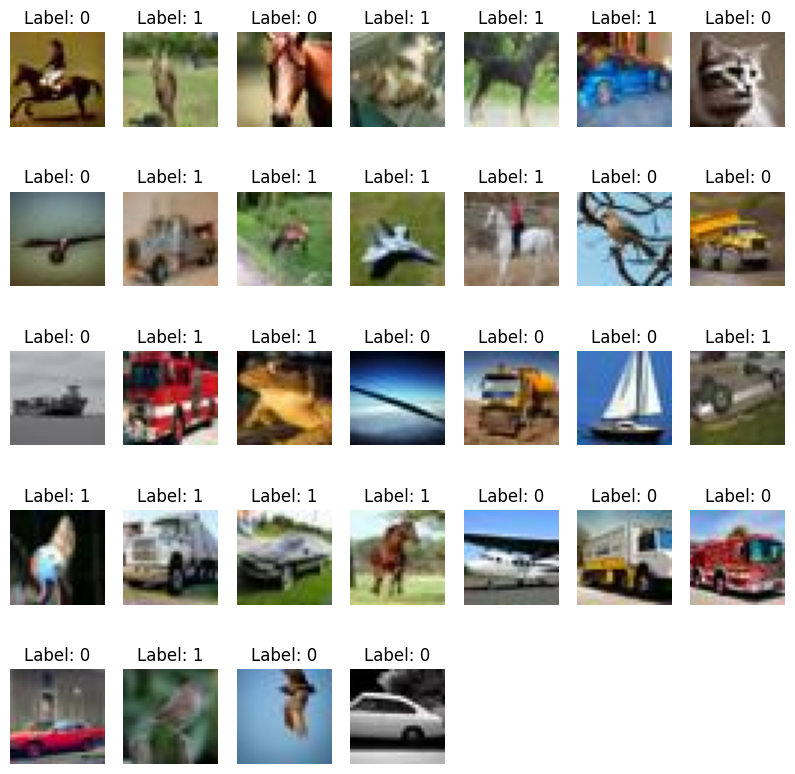

2024-10-30 10:24:26.807306: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [75]:
import matplotlib.pyplot as plt

for images, labels in images_train.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(32):
        ax = plt.subplot(5, 7, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()


Modeling


In [76]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [77]:
for layer in base_model.layers:
    layer.trainable = False

In [78]:
model = base_model.output

In [79]:
model = GlobalAveragePooling2D()(model)
model = Dense(20, activation='relu')(model)
model = Dense(1, activation='sigmoid')(model)

In [80]:
final_model = Model(inputs=base_model.input, outputs=model)

In [81]:
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
final_model.fit(images_train, epochs=10, batch_size=128, validation_data=images_val, callbacks=[es])

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 278s 111ms/step - accuracy: 0.7842 - loss: 0.9198 - val_accuracy: 0.8493 - val_loss: 0.3526
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 277s 111ms/step - accuracy: 0.8535 - loss: 0.3411 - val_accuracy: 0.8553 - val_loss: 0.3396
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 250s 100ms/step - accuracy: 0.8660 - loss: 0.3176 - val_accuracy: 0.8619 - val_loss: 0.3267
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 238s 95ms/step - accuracy: 0.8723 - loss: 0.3028 - val_accuracy: 0.8654 - val_loss: 0.3220
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8763 - loss: 0.2926